In [45]:
!pip install batman-package

In [22]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [23]:
search_result = lk.search_lightcurve("EPIC 201912552", mission="K2")

In [24]:
print(search_result)

SearchResult containing 4 data products.

 #     mission     year  author  exptime  target_name  distance
                                    s                   arcsec 
--- -------------- ---- -------- ------- ------------- --------
  0 K2 Campaign 01 2014       K2    1800 ktwo201912552      0.0
  1 K2 Campaign 01 2014  EVEREST    1800 ktwo201912552      0.0
  2 K2 Campaign 01 2014    K2SFF    1800 ktwo201912552      0.0
  3 K2 Campaign 01 2014 K2VARCAT    1800 ktwo201912552      0.0


In [25]:
lc=search_result[0].download()

In [26]:
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1975.1781333280233,———,———,10000000000000000000,4.906808e-03,———,———,91332,———,———,———,———,———,———,10000000000000000000,———,———,———,———,———,———,———,———,-6.6435559e+02,-9.4249713e+02
1977.2622190633774,———,———,0,4.764543e-03,662.31208,941.53075,91434,1.2118546e+05,1.0433599e+01,4.3317065e+03,1.5778823e+00,———,———,0,662.33306,6.8831621e-05,941.54286,6.1239807e-05,662.31208,1.4743082e-04,941.53075,1.1899117e-04,-1.0307666e+00,-3.4397319e-01
1977.2826512454412,———,———,1100000000000000000,4.763125e-03,662.30571,941.52882,91435,1.2100988e+05,1.0432299e+01,4.3357134e+03,1.5792650e+00,———,———,1100000000000000000,662.32611,6.9062866e-05,941.54036,6.1216619e-05,662.30571,1.4763001e-04,941.52882,1.1904490e-04,-1.0380870e+00,-3.4630057e-01
1977.3030833270386,———,———,0,4.761707e-03,662.30030,941.52528,91436,1.2088665e+05,1.0425575e+01,4.3376670e+03,1.5762006e+00,———,———,0,662.32059,6.9101421e-05,941.53644,6.1234830e-05,662.30030,1.4776348e-04,941.52528,1.1911125e-04,-1.0433900e+00,-3.4934008e-01
1977.3439477888314,———,———,1100000000000000000,4.758869e-03,663.33755,942.01828,91438,1.2967055e+05,1.0812551e+01,4.3258945e+03,1.5825691e+00,———,———,1100000000000000000,663.38444,7.0446826e-05,942.03215,4.4128799e-05,663.33755,1.2286405e-04,942.01828,1.0869294e-04,-2.3458952e-03,6.6799723e-02
1977.3643799690326,1.3359070e+05,1.1141393e+01,0,4.757449e-03,663.31184,942.02096,91439,1.2965963e+05,1.0808771e+01,4.3267119e+03,1.5844598e+00,1.3359070e+05,1.1141393e+01,0,663.35126,7.3913077e-05,942.03258,4.4541066e-05,663.31184,1.2302556e-04,942.02096,1.0862054e-04,-2.7619282e-02,6.9890857e-02
1977.3848121487608,1.3358853e+05,1.1138790e+01,0,4.756029e-03,663.30413,942.01743,91440,1.2963146e+05,1.0807457e+01,4.3291162e+03,1.5753057e+00,1.3358853e+05,1.1138790e+01,0,663.34196,7.4051422e-05,942.02834,4.4509714e-05,663.30413,1.2309608e-04,942.01743,1.0871489e-04,-3.5213858e-02,6.7309730e-02
1977.4052443280307,1.3362042e+05,1.1137683e+01,1100000000000000000,4.754608e-03,663.29630,942.01775,91441,1.2964126e+05,1.0806588e+01,4.3210728e+03,1.5793828e+00,1.3362042e+05,1.1137683e+01,1100000000000000000,663.33242,7.4374613e-05,942.02806,4.4511271e-05,663.29630,1.2312987e-04,942.01775,1.0868334e-04,-4.3087378e-02,6.8070605e-02


In [27]:
# lc1=lc.remove_nans()

In [28]:
# median ensures a stable baseline against noise and rare events.Mean on other hand does not provide a good baseline for normalisation because extremities in the data due to various factors like telescope jitter, other astronomical events, bad pixel data capture, etc.
flux=lc.flux
time=lc.time
flux_norm= flux/np.median(flux)
flux_norm=np.array(flux_norm, dtype= float)

In [29]:
import numpy as np
import pandas as pd

In [30]:
print(flux_norm[:10])

[       nan        nan        nan        nan        nan 1.00109696
 1.00108075 1.00131977 1.0013063  1.00130975]


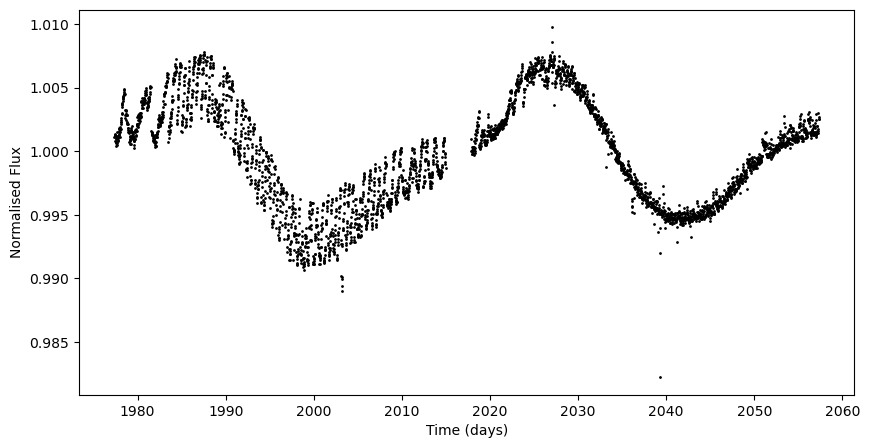

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(lc.time.value, flux_norm, "k.", markersize=2) #time.value-> for converting BKJD days into numerical val
plt.xlabel("Time (days)")
plt.ylabel("Normalised Flux")
plt.show()

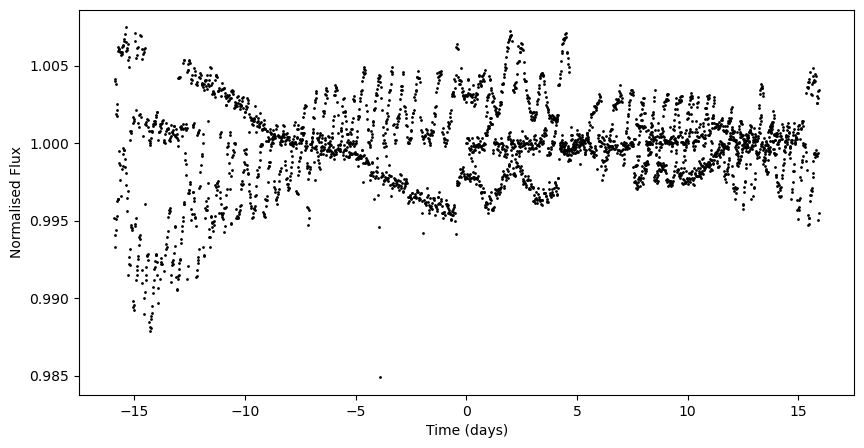

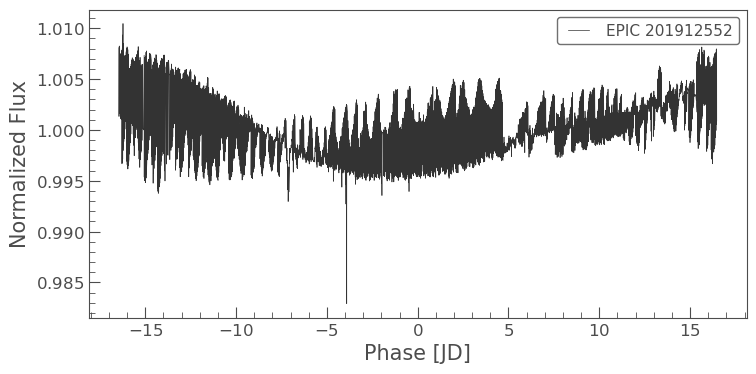

In [ ]:
lc_flat = lc.remove_nans().flatten(window_length=2001)
lc_fold = lc_flat.fold(period=32.94)
trend=pd.Series(lc_fold.flux).rolling(window=101, center= True).median().to_numpy() #taking a rolling median for each flux_norm point over a 101 range/window to npotice the background trend
flux_detrended= lc_fold.flux/trend

plt.figure(figsize=(10, 5))
plt.plot(lc_fold.time.value, flux_detrended, "k.", markersize=2) #time.value-> for converting BKJD days into numerical val
plt.xlabel("Time (days)")
plt.ylabel("Normalised Flux")
plt.show()